#Ken Boling Project 1 Revised

In [2]:
# ECE471/571 project 1
# Ken Boling
# Python 3.6.2
# Pycharm Development Environment
# Juypter Notebook

# Data management tools:
import pandas as pd
import numpy as np

# Plotting tools:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import seaborn as sns

# other tools:
import os
import time

# Juypter Notebook tools:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display

# This helps with displaying data tables in a Juypter Notebook   
InteractiveShell.ast_node_interactivity = "all"


# Select output directroy for figures etc.
outputdir = 'C:\\Users\\Ken\\Google Drive\\UTK Class work\\Pattern Classification\\project 1'

# load data into pandas dataframe
trdata = pd.read_csv(
    'C:\\Users\\Ken\\Google Drive\\UTK Class work\\Pattern Classification\\project 1\\synth.tr'
                     , delim_whitespace=True)
tedata = pd.read_csv(
    'C:\\Users\\Ken\\Google Drive\\UTK Class work\\Pattern Classification\\project 1\\synth.te'
                     , delim_whitespace=True)

#check that the data loaded correctly

print('trainng data',trdata.head(10),sep=2*'\n')
print('testing data',tedata.head(10),sep=2*'\n')


trainng data

         xs        ys  yc
0  0.051008  0.160862   0
1 -0.748074  0.089040   0
2 -0.772934  0.263172   0
3  0.218374  0.127061   0
4  0.372683  0.496562   0
5 -0.629315  0.632022   0
6 -0.433072  0.144792   0
7 -0.841520 -0.191313   0
8  0.475256  0.224837   0
9  0.320830  0.327213   0
testing data

         xs        ys  yc
0 -0.970990  0.429425   0
1 -0.631997  0.251953   0
2 -0.773606  0.690751   0
3 -0.606212  0.175678   0
4 -0.539409  0.376744   0
5 -0.960326  0.110041   0
6 -1.041376  0.328508   0
7 -0.822601  0.175874   0
8 -0.943715 -0.180633   0
9 -0.968763  0.296070   0


# Maximum Likelihood Estimation
Calculate mean (mu) and the covarience matrix for a Gaussian distribution

Define the function to find the mean vector (Mu)

In [3]:
# Maximum Likelihood Estimation

# function to calculate the mean vector of each column of a ndarray, 
# stores the results in the equivalent to a row vector

def meanvectornorm(matrix):
    n = np.shape(matrix)[0]  # number of rows in the matrix
    summ = (np.sum(matrix, axis=0))  # sum of each column of the matrix
    muv = np.array([[(1 / n) * summ[0]], [(1 / n) * summ[1]]])
    return muv


Define the function to find the covarience matrix

In [4]:
# function to calculate the covariance matrix from a data set


# function to calculate the covariance matrix from a data set
def covmat(matrix):

    d = matrix.ndim # gets the number of dimensions in the matrix
    Ei = np.zeros([d , d]) # Creates an array of 0s that is d by d
    n = np.shape(matrix)[0] #numberr of rows in the matrix

    summ = (np.sum(matrix, axis = 0)) #sum of each column of the matrix
    muv = np.array([[(1/n)* summ[0]],[(1/n)* summ[1]]]) #calculates Mu vector

    for irow in matrix: # for loops iterate through the rows of an numpy array by default
        xrow = irow.reshape(-1,1) #converts the row vector to a column vector
        # calculate (x - mu)(x - mu)T for that row
        isum = np.outer([(xrow - muv)] , [(np.transpose(xrow) - np.transpose(muv))]) 
        Ei = Ei + isum # adds the matrices to the total

    covmatrix = ((1 / (n-1)) * Ei )

    return covmatrix




Calculate the mean and covarience matrix for each class

In [5]:
# separates each class into two separate arrays and
# grabs the first two columns from the original imported data

# split up the training data by class
trclass0 = np.array(trdata[(trdata.yc == 0)])[:, :2]
trclass1 = np.array(trdata[(trdata.yc == 1)])[:, :2]


# calculate Mu
Muclass0 = meanvectornorm(trclass0)
Muclass1 = meanvectornorm(trclass1)


# calcualate the total covarience matrix
Et = np.array(covmat(np.array(trdata.iloc[:, :2]))) 


# calcualate the  covarience matrix for each class
E0 = np.array(covmat(trclass0))
E1 = np.array(covmat(trclass1))


print ('class 0 mean vector:', Muclass0, sep=2*'\n')
print ('class 1 mean vector:', Muclass1, sep=2*'\n')

print ('class 0 covariance matrix:', E0, sep=2*'\n')
print ('class 1 covariance matrix:', E1, sep=2*'\n')



class 0 mean vector:

[[-0.22147024]
 [ 0.32575494]]
class 1 mean vector:

[[0.07595431]
 [0.68296891]]
class 0 covariance matrix:

[[0.27680955 0.01122866]
 [0.01122866 0.03611906]]
class 1 covariance matrix:

[[ 0.15974786 -0.01557501]
 [-0.01557501  0.02995842]]


#Case 1 (Euclidean Distance)

Define the function for case 1

In [6]:
# Case 1 (Euclidean Distance)
# Define the Case 1 function

def euclidist(X, muv1, muv2):
    start = time.time() # timer
    xy = X[X.columns[:2]]
    
    # creates two new columns with the distance of each point from the mean of each class 
    X['euclid_dist_class_0'] = np.sqrt(np.sum(np.power(np.subtract(xy, muv1.T),2),axis=1))
    X['euclid_dist_class_1'] = np.sqrt(np.sum(np.power(np.subtract(xy, muv2.T),2),axis=1))

    # selects the class based on the smaller of the two
    conditions = (X['euclid_dist_class_0'] < X['euclid_dist_class_1'], 
                  X['euclid_dist_class_0'] > X['euclid_dist_class_1'] )
    choices = (0 , 1)
    X['case_1_class'] = np.select(conditions, choices)
    
    # I don't remember why I put this here, but I probably should not touch it...
    Xout = X.astype(dtype={'case_1_class': 'int64'}) 
    
    # prints 
    end = time.time()
    print ('time to complete:', end - start, 'seconds')
    
    return Xout



Now to run the case 1 function using the values of Mu derived from the training data to classify the testing dataset

In [7]:
Case_1_class = euclidist(tedata, Muclass0, Muclass1)

print(Case_1_class[['yc', 'case_1_class']].head(10))

time to complete: 0.015010356903076172 seconds
   yc  case_1_class
0   0             0
1   0             0
2   0             0
3   0             0
4   0             0
5   0             0
6   0             0
7   0             0
8   0             0
9   0             0


#Case II (Minimum Mahalanobis Distance) 

Define the function for Case 2

In [8]:
# Case 2 (Mahalanobis Distance)

# Define the Case 2 function:

def mahalanobisdist2(X, E1, E2, muv1, muv2):
    start = time.time() # timer started
    xy = np.array(X.iloc[:,:2]) # select all rows in the first 2 columns
    case_2_class = [] #emtpy data object to add reslts to
    for irow in xy:
        xrow = irow.reshape(-1,1) #converts the row vector to a column vector
        
        # Calculates the mahalanobis distance between each data point 
        # and the mean determined for each class 
        
        md1 = np.dot(np.dot((xrow - muv1).T , np.linalg.inv(E1)),(xrow - muv1))
                           
        md2 = np.dot(np.dot((xrow - muv2).T , np.linalg.inv(E2)) ,(xrow - muv2))
        
        g1 = -md1/2
        g2 = -md2/2

        conditions = (g1 > g2, g1 < g2)
        choices = (0, 1)
        select = np.select(conditions, choices)
        case_2_class.append(select)


        
    discrim = pd.DataFrame(np.concatenate(case_2_class))
    discrim.rename(columns={0: 'case_2_class'}, inplace=True)

    Xout = pd.concat([X, discrim], axis=1)

    # prints 
    end = time.time()
    print ('time to complete:', end - start, 'seconds')
    return Xout


In [9]:
Case_2_dist_Et = mahalanobisdist2(X=tedata, E1=Et, E2=Et, muv1=Muclass0, muv2=Muclass1)
print (Case_2_dist_Et[['yc', 'case_2_class']].head(10))

Case_2_dist_E0 = mahalanobisdist2(X=tedata, E1=E0, E2=E0, muv1=Muclass0, muv2=Muclass1)
print (Case_2_dist_E0[['yc','case_2_class']].head(10))

Case_2_dist_E1 = mahalanobisdist2(X=tedata, E1=E1, E2=E1, muv1=Muclass0, muv2=Muclass1)
print (Case_2_dist_E1[['yc','case_2_class']].head(10))

time to complete: 0.10811305046081543 seconds


   yc  case_2_class
0   0             0
1   0             0
2   0             1
3   0             0
4   0             0
5   0             0
6   0             0
7   0             0
8   0             0
9   0             0
time to complete: 0.08808469772338867 seconds
   yc  case_2_class
0   0             0
1   0             0
2   0             1
3   0             0
4   0             0
5   0             0
6   0             0
7   0             0
8   0             0
9   0             0


time to complete: 0.1451396942138672 seconds
   yc  case_2_class
0   0             0
1   0             0
2   0             1
3   0             0
4   0             0
5   0             0
6   0             0
7   0             0
8   0             0
9   0             0


#Case III (Maximum A-Priori Probability)

In [10]:
# Case 3 (Maximum A-Priori Probability, Mahalanobis Distance)

# Define the Case 3 function:

def case_3_discrim(X, E1, E2, muv1, muv2):
    start = time.time() # timer started
    xy = np.array(X.iloc[:,:2]) # select all rows in the first 2 columns
    case_2_class = [] #emtpy data object to add reslts to
    for irow in xy:
        xrow = irow.reshape(-1,1) #converts the row vector to a column vector
        test1 = (xrow - muv1)
        #print(test1)

        # Calculates the mahalanobis distance between each
        #  data point and the mean determined for each class 
          
        md1 = np.dot(np.dot((xrow - muv1).T , np.linalg.inv(E1)),(xrow - muv1)) 
                           
        md2 = np.dot(np.dot((xrow - muv2).T , np.linalg.inv(E2)) ,(xrow - muv2))
        
        g1 = -md1/2 - ((np.log(np.linalg.det(E1)))/2)
        g2 = -md2/2 - ((np.log(np.linalg.det(E2)))/2)

        #md1 = np.sqrt(
                   # np.dot(
        #                np.dot((xrow - muv1).T , np.linalg.inv(E1)) 
         #                   ,(xrow - muv1)))
       # md2 = np.sqrt(
        #            np.dot(
        #                np.dot((xrow - muv2).T , np.linalg.inv(E2)) 
        #                    ,(xrow - muv2)))
        conditions = (g1 > g2, g1 < g2)
        choices = (0, 1)
        select = np.select(conditions, choices)
        case_2_class.append(select)


        
    discrim = pd.DataFrame(np.concatenate(case_2_class))
    discrim.rename(columns={0: 'case_2_class'}, inplace=True)

    Xout = pd.concat([X, discrim], axis=1)

    # prints 
    end = time.time()
    print ('time to complete:', end - start, 'seconds')
    return Xout



Run the class 3 function using the Mahalanobis Distance equation with different values for the covarience matrix for each class     

In [11]:
Case_3_class = case_3_discrim(X=tedata, E1=E0, E2=E1, muv1=Muclass0, muv2=Muclass1)

print(Case_3_class[['yc', 'case_2_class']].head(10))

time to complete: 0.14814162254333496 seconds
   yc  case_2_class
0   0             0
1   0             0
2   0             1
3   0             0
4   0             0
5   0             0
6   0             0
7   0             0
8   0             0
9   0             0


In order to analyze the results an error checking function was built.  This function also prints the data graphically and saves it to the local PC.

In [12]:
def errorchk(df, truecol, testcol, title, x, y):
    
    start = time.time() #timer
    
    #discriminator
    conditions = (truecol == testcol, truecol != testcol) 
    choices = ('correct', 'error')
    df['error1'] = np.select(conditions,choices)
    
    #the pandas groupby function was used to get the total counts of the errors for each class
    rate = df.groupby('error1', as_index=False).size()
    accuracy = (rate['correct'])/(rate['correct'] + rate['error'])
    colordef0 = ['blue' if i == 0 else 'None' for i in truecol]
    colordef1 = ['green' if i == 1 else 'None' for i in truecol]

    colordeferr = ['red' if i == 'error' else 'None' for i in df['error1']]
    
    # plots the data
    plt.subplots()
    plt.scatter(x=x, y=y, c=colordef0, label='Class 0',  s=5)
    plt.scatter(x=x, y=y, c=colordef1, label='Class 1',  s=5)
    plt.scatter(x=x, y=y, c=colordeferr, label='Error', marker='^',  s=4)
    plt.grid()
    plt.title(title)
    plt.legend()
    plt.savefig((os.path.join(outputdir, title) + '.png'), dpi=600)

    plt.show()
    end = time.time()
    
    print ('total accuracy:',accuracy)
    print ('time to complete:', end - start, 'seconds')

    return df




Now to apply this function to the data from each classifier

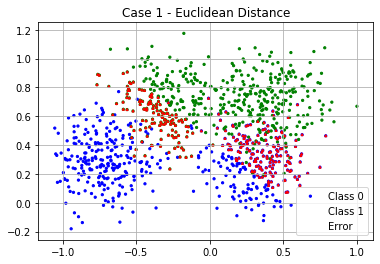

total accuracy: 0.713
time to complete: 1.327270269393921 seconds
   yc  case_1_class   error1
0   0             0  correct
1   0             0  correct
2   0             0  correct
3   0             0  correct
4   0             0  correct
5   0             0  correct
6   0             0  correct
7   0             0  correct
8   0             0  correct
9   0             0  correct


In [13]:

Case_1_class_chk= errorchk(df=Case_1_class,
                           truecol=Case_1_class['yc'],
                           testcol=Case_1_class['case_1_class'],
                           title='Case 1 - Euclidean Distance',
                           x=Case_1_class['xs'],
                           y=Case_1_class['ys'])
print (Case_1_class_chk[['yc', 'case_1_class', 'error1']].head(10))


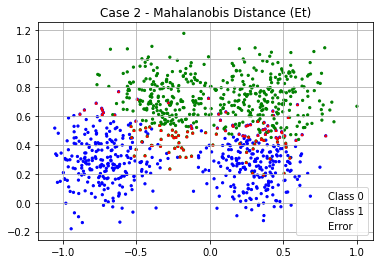

total accuracy: 0.892
time to complete: 1.12607741355896 seconds
   yc  case_2_class   error1
0   0             0  correct
1   0             0  correct
2   0             1    error
3   0             0  correct
4   0             0  correct
5   0             0  correct
6   0             0  correct
7   0             0  correct
8   0             0  correct
9   0             0  correct


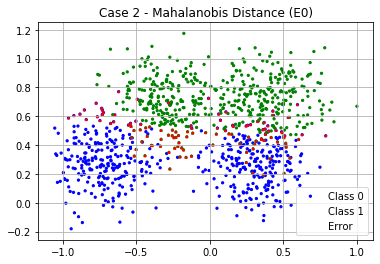

total accuracy: 0.885
time to complete: 0.9699409008026123 seconds
   yc  case_2_class   error1
0   0             0  correct
1   0             0  correct
2   0             1    error
3   0             0  correct
4   0             0  correct
5   0             0  correct
6   0             0  correct
7   0             0  correct
8   0             0  correct
9   0             0  correct


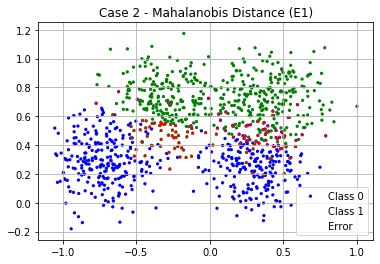

total accuracy: 0.882
time to complete: 0.9519128799438477 seconds
   yc  case_2_class   error1
0   0             0  correct
1   0             0  correct
2   0             1    error
3   0             0  correct
4   0             0  correct
5   0             0  correct
6   0             0  correct
7   0             0  correct
8   0             0  correct
9   0             0  correct


In [14]:
Case_2_class_chk_Et= errorchk(df=Case_2_dist_Et,
                           truecol=Case_2_dist_Et['yc'],
                           testcol=Case_2_dist_Et['case_2_class'],
                           title='Case 2 - Mahalanobis Distance (Et)',
                           x=Case_1_class['xs'],
                           y=Case_1_class['ys'])
print (Case_2_class_chk_Et[['yc', 'case_2_class', 'error1']].head(10))

Case_2_class_chk_E0= errorchk(df=Case_2_dist_E0,
                           truecol=Case_2_dist_E0['yc'],
                           testcol=Case_2_dist_E0['case_2_class'],
                           title='Case 2 - Mahalanobis Distance (E0)',
                           x=Case_1_class['xs'],
                           y=Case_1_class['ys'])
print (Case_2_class_chk_E0[['yc', 'case_2_class', 'error1']].head(10))

Case_2_class_chk_E1= errorchk(df=Case_2_dist_E1,
                           truecol=Case_2_dist_E1['yc'],
                           testcol=Case_2_dist_E1['case_2_class'],
                           title='Case 2 - Mahalanobis Distance (E1)',
                           x=Case_1_class['xs'],
                           y=Case_1_class['ys'])
print (Case_2_class_chk_E1[['yc', 'case_2_class', 'error1']].head(10))


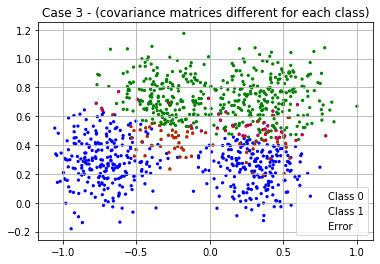

total accuracy: 0.898
time to complete: 0.9719433784484863 seconds
   yc  case_2_class   error1
0   0             0  correct
1   0             0  correct
2   0             1    error
3   0             0  correct
4   0             0  correct
5   0             0  correct
6   0             0  correct
7   0             0  correct
8   0             0  correct
9   0             0  correct


In [15]:
Case_3_class_chk= errorchk(df=Case_3_class,
                           truecol=Case_3_class['yc'],
                           testcol=Case_3_class['case_2_class'],
                           title='Case 3 - (covariance matrices different for each class)',
                           x=Case_1_class['xs'],
                           y=Case_1_class['ys'])
print (Case_3_class_chk[['yc', 'case_2_class', 'error1']].head(10))


In [16]:


# Define classifiers 

# Case 1

# kNN classifier from project 2 

def Kens_kNN(trX, X, k):
    start = time.time()

    kNNlist = []
    #kNNclass = pd.DataFrame(columns=['kNN_class', 'yc'], index=X.index)

    def rowply(row):
        Xrow = pd.DataFrame(row[['xs', 'ys']])
        trXnum = pd.DataFrame(trX[['xs', 'ys']])


        Xdist = pd.DataFrame(np.sqrt(np.sum(np.power(np.subtract(trXnum, Xrow.T), 2), axis=1)))
        Xdist.rename(columns={0: 'dist'}, inplace=True)
        trdataX = pd.concat([Xdist, trX['yc']], axis=1)

        test1 = trdataX.nsmallest(n=k, columns='dist', keep='first')

        test2 = test1.groupby('yc').size().reset_index()

        test2.rename(columns={0: 'count'}, inplace=True)

        test3 = test2.nlargest(n=1, columns='count', keep='first')

        kNNlist.append(test3['yc'].values)

        return

    X.apply(rowply, axis=1)

    kNNclasslistapp = pd.DataFrame(np.concatenate(kNNlist))
    kNNclasslistapp.rename(columns={0: 'kNN_class'}, inplace=True)

    Xout = pd.concat([X, kNNclasslistapp], axis=1)
    end = time.time()
    print ('time to complete:', end - start, 'seconds')
    return Xout

time to complete: 9.184797048568726 seconds
   yc  kNN_class
0   0          0
1   0          0
2   0          0
3   0          0
4   0          0
5   0          0
6   0          0
7   0          0
8   0          0
9   0          0


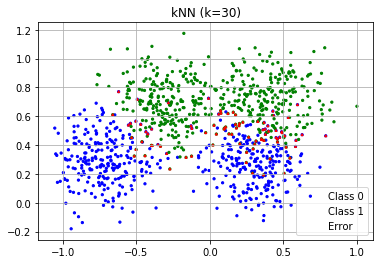

total accuracy: 0.914
time to complete: 0.983954906463623 seconds


In [17]:
kNNtest = Kens_kNN(trdata, tedata, k=30)

print(kNNtest[['yc','kNN_class']].head(10))

kNNcheck= errorchk(df=kNNtest,
                   truecol=kNNtest['yc'],
                   testcol=kNNtest['kNN_class'],
                   title='kNN (k=30)',
                   x=Case_1_class['xs'],
                   y=Case_1_class['ys'])


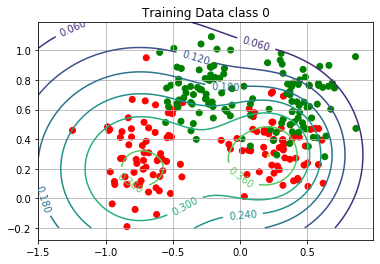

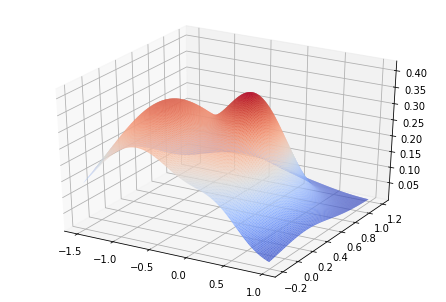

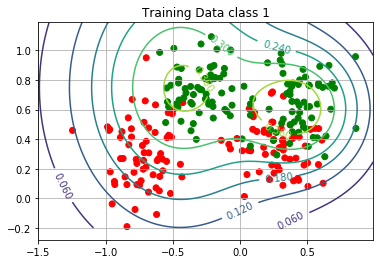

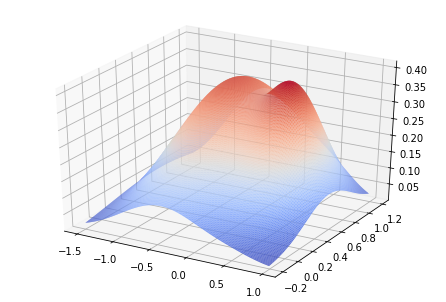

In [18]:

# assign values as in the twomodal.m example, numpy ndarrys are used instead of matrices since they work the same way and are apparently "better" according to:
# https://www.numpy.org/devdocs/user/numpy-for-matlab-users.html

#class 0


d_0 = 2
mu1_0 = np.array([[-0.75], [0.2]])
mu2_0 = np.array([[0.3], [0.3]])
S1_0 = np.array([[0.4, 0], [0, 0.3]])
S2_0 = np.array([[0.1, 0], [0, 0.1]])
A1_0 = 0.8
A2_0 = 1 - A1_0


d_1 = 2
mu1_1 = np.array([[-0.45], [0.75]])
mu2_1 = np.array([[0.5], [0.6]])
S1_1 = np.array([[0.3, 0], [0, 0.4]])
S2_1 = np.array([[0.1, 0], [0, 0.1]])
A1_1 = 0.8
A2_1 = 1 - A1_1



# set up range of values to calcualte over
ix = np.arange(start=-1.5, stop=1, step=0.01)
jy = np.arange(start=-0.2, stop=1.2, step=0.01)

ix_2 = np.arange(start=-1.5, stop=1, step=0.01)
jy_2 = np.arange(start=-0.2, stop=1, step=0.01)


def two_modal_gaussian(d, mu1, mu2, S1, S2, A1, A2, ix, jy, title ):
    # create an empty array of the size required by the values entered above
    px = np.zeros([np.size(jy), np.size(ix)])
    # Iterate over the empty array calculating the result for each cell in the px array individually.
    # This took awhile to figure out, but I learned the utility of using "enumerate" in a for loop in the process!
    # ni and nj act as counters representing the number of loops for each iteration and are used to define the x,y coordinates for each cell
    for i, ni in enumerate(ix):
        for j, nj in enumerate(jy):
            x = np.array([[ni], [nj]])
            px1 = A1 / (((2 * np.pi) ** (d / 2)) * np.linalg.det(S1) ** (1 / 2)) * np.exp(
                (-1 / 2) * (x - mu1).conj().transpose() @ np.linalg.inv(S1) @ (x - mu1))

            px2 = A2 / (((2 * np.pi) ** (d / 2)) * np.linalg.det(S2) ** (1 / 2)) * np.exp(
                (-1 / 2) * (x - mu2).conj().transpose() @ np.linalg.inv(S2) @ (x - mu2))

            px[j, i] = px1 + px2
    # plot the figures

    # Sets up the color definitions for the datapoints (this code only works for two classes, there is probably a smarter way to do this...)
    colordef = ['red' if i == 0 else 'green' for i in trdata['yc']]

    # plots the data
    fig1, ax = plt.subplots()
    contourvalues = ax.contour(ix, jy, px)
    ax.clabel(contourvalues, inline=1, fontsize=10)
    ax.scatter(x=trdata['xs'], y=trdata['ys'], c=colordef, label=trdata['yc'])
    ax.grid()
    ax.set_title(title)
    plt.show()
    fig1.savefig((os.path.join(outputdir, title) + '.png'), dpi=600)

    # plot the result in 3D
    X3d, Y3d = np.meshgrid(ix, jy)
    fig2 = plt.figure()
    ax = Axes3D(fig2)
    ax.plot_surface(X3d, Y3d, px, rstride=1, cstride=1, cmap=cm.coolwarm)
    plt.show()
    fig2.savefig((os.path.join(outputdir, (title + '_3D') + '.png')))
    return px

class_0_two_modal = two_modal_gaussian(
    d=d_0,
    mu1=mu1_0,
    mu2=mu2_0,
    S1=S1_0,
    S2=S2_0,
    A1=A1_0,
    A2=A2_0,
    ix=ix, jy=jy, title='Training Data class 0')

class_1_two_modal = two_modal_gaussian(
    d=d_1,
    mu1=mu1_1,
    mu2=mu2_1,
    S1=S1_1,
    S2=S2_1,
    A1=A1_1,
    A2=A2_1,
    ix=ix, jy=jy, title='Training Data class 1')


